In [1]:
import tweepy
import pandas as pd
import numpy as np

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, 
                   wait_on_rate_limit_notify=True, retry_count=5,
                  retry_delay=10)

#### Coleta de Dados (busca por palavra chave)

In [4]:
# Definir listas de armazenamento
tweets = []
info = []

In [5]:
# Definir que palavras (keyword) que deseja pesquisar no Twitter
keyword = ('"home office" OR "trabalho remoto" OR #homeoffice OR #trabalhoremoto')

#### Buscar por palavra chave e recuperar os tweets em inglês

In [6]:
for tweet in tweepy.Cursor(api.search,
                          q=keyword, tweet_mode='extended',
                          rpp=18000, result_type='popular', lang='pt', 
                          include_entities=True).items(18000):
    
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text

    newtweet = aux.replace("\n", " ")

    tweets.append(newtweet)
    info.append(tweet)

In [7]:
# Para verificar a quantidade de tweets coletado use a função "len()"
print("Total de tweets coletados %s." % len(info))

Total de tweets coletados 15.


In [8]:
tweets

['Servidora da Caixa perde pai e mãe para Covid-19 após ter home office negado, no DF https://t.co/A3StClKNSB https://t.co/RMbKh7axXI',
 'Mais home office para bem formados traz destruição do emprego de baixa qualificação https://t.co/azBXYlItPb',
 'Pais de funcionária da Caixa morreram com Covid-19 após banco ter negado home office, diz sindicato (via @radaronline) https://t.co/TGO5siILiy https://t.co/jzMZhATIem',
 'O home office tirou algo terrivel que tbm nos fazia bem: o trânsito de volta pra casa. É ótimo não te-lo, óbvio. Mas é preciso encontrar o substituto pro papel que ele cumpria: o de descompressão pós trabalho, o ato de se desligar, de ouvir música, de pensar em outras coisas.',
 'Pela normalização desse lookinho no home office! 😂 @zecapagodinho #ÉDeCasa https://t.co/kPeHL1TpQp',
 'Pesquisa DataFolha aponta que afazeres domésticos dificultam home office para 64,5% das mulheres. 40% tiveram o sustento da casa em risco. Realidade é ainda mais cruel p/ mulheres pobres e negras

In [9]:
file = open('tweets_keyword_desafio.txt', 'a', -1, 'utf-8')
for tweet in tweets:
    file.write(tweet+"\n")
file.close()

#### Criar dataframe

In [10]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

tweets_df['len'] = np.array([len(tweet) for tweet in tweets])
tweets_df['ID'] = np.array([tweet.id for tweet in info])
tweets_df['USER'] = np.array([tweet.user for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location'] = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes'] = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets'] = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo'] = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates'] = np.array([tweet.coordinates for tweet in info])
tweets_df['Place'] = np.array([tweet.place for tweet in info])

tweets_df.to_csv('tweets18000_keyword_HomeOffice.csv')

In [11]:
tweets_df

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Servidora da Caixa perde pai e mãe para Covid-...,131,1291912278313299969,User(_api=<tweepy.api.API object at 0x000001C7...,Jornal Extra,Brasil,None,2020-08-08 01:41:04,dlvr.it,62,29,None,None,None
1,Mais home office para bem formados traz destru...,107,1291568759556235266,User(_api=<tweepy.api.API object at 0x000001C7...,Folha de S.Paulo,"São Paulo, Brazil",None,2020-08-07 02:56:03,Folha com welcome-app 1.0,138,19,None,None,None
2,Pais de funcionária da Caixa morreram com Covi...,166,1291520755348287489,User(_api=<tweepy.api.API object at 0x000001C7...,VEJA,Brazil,None,2020-08-06 23:45:18,Twitter Web App,135,25,None,None,None
3,O home office tirou algo terrivel que tbm nos ...,276,1290392340608307207,User(_api=<tweepy.api.API object at 0x000001C7...,Gabe Simas,gabriel@gabrielsimas.com,None,2020-08-03 21:01:22,Twitter for iPhone,15395,1427,None,None,None
4,Pela normalização desse lookinho no home offic...,98,1292045744073998337,User(_api=<tweepy.api.API object at 0x000001C7...,Globo em 🏠,,None,2020-08-08 10:31:25,Twitter Web App,71,6,None,None,None
5,Pesquisa DataFolha aponta que afazeres domésti...,278,1291333447772975106,User(_api=<tweepy.api.API object at 0x000001C7...,Erika Kokay,"Brasil, Distrito Federal",None,2020-08-06 11:21:00,Twitter for iPhone,545,108,None,None,None
6,Eu não sou Lady Gaga mas hoje tô 100% cromátic...,236,1290650054668292100,User(_api=<tweepy.api.API object at 0x000001C7...,Gshow em 🏠,,None,2020-08-04 14:05:26,Twitter Web App,846,133,None,None,None
7,"ATENÇÃO! ""Os indígenas xikrin, de dentro de su...",267,1290393301674340352,User(_api=<tweepy.api.API object at 0x000001C7...,Alessandro Molon 🇧🇷,Rio de Janeiro - RJ,None,2020-08-03 21:05:12,TweetDeck,442,77,None,None,None
8,Pesquisa aponta que afazeres domésticos dificu...,110,1291404027255828481,User(_api=<tweepy.api.API object at 0x000001C7...,Mauro Paulino,São Paulo,None,2020-08-06 16:01:27,Twitter for iPad,97,19,None,None,None
9,#AJustiçaNãoPara ⚖️ Durante o período da pande...,292,1289315174298423297,User(_api=<tweepy.api.API object at 0x000001C7...,STF,Brasília - DF,None,2020-07-31 21:41:06,Twitter Web App,206,36,None,None,None


#### Identificar Top Tweets coletados

In [12]:
# Tweets com maior número de Likes
likes_max = np.max(tweets_df['Likes'])

# pega o primeiro tweet com o valor máximo
likes = tweets_df[tweets_df.Likes == likes_max].index[0] 

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
O home office tirou algo terrivel que tbm nos fazia bem: o trânsito de volta pra casa. É ótimo não te-lo, óbvio. Mas é preciso encontrar o substituto pro papel que ele cumpria: o de descompressão pós trabalho, o ato de se desligar, de ouvir música, de pensar em outras coisas.
Número de curtidas: 15395


In [13]:
# Conta quantos tweets possuem o mesmo valor máximo
print (np.sum(tweets_df['Likes'] == likes_max)) 

1


In [14]:
# Retorna valor máximo de retweets
retweet_max = np.max(tweets_df['Retweets'])

# Pega o primeiro tweet com valor máximo de retweets
retweet = tweets_df[tweets_df.Retweets == retweet_max].index[0]

print('O tweet com mais retweets é: \n{}'.format(tweets_df['Tweets'][retweet]))
print('Número de retweets: {}'.format(retweet_max))

O tweet com mais retweets é: 
O home office tirou algo terrivel que tbm nos fazia bem: o trânsito de volta pra casa. É ótimo não te-lo, óbvio. Mas é preciso encontrar o substituto pro papel que ele cumpria: o de descompressão pós trabalho, o ato de se desligar, de ouvir música, de pensar em outras coisas.
Número de retweets: 1427


In [15]:
print(np.sum(tweets_df['Retweets'] == retweet_max))

1


#### Identifica a font dos Tweets

In [16]:
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

# Retorna um novo vetor, com o númro de elementos do vetor sources
percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

#### Gráfico que exite o número de tweets por font

In [17]:
sourceDF = pd.DataFrame({
    'source' : percent,
}, index=sources)

sourceDF

,source
dlvr.it,1.0
Folha com welcome-app 1.0,1.0
Twitter Web App,8.0
Twitter for iPhone,2.0
TweetDeck,2.0
Twitter for iPad,1.0


In [18]:
# Pacatos para visualização
import matplotlib.pyplot as plt

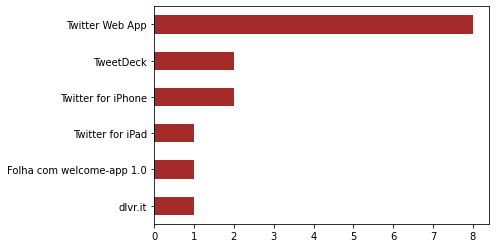

In [19]:
sources_sorted = sourceDF.sort_values('source', ascending=True)
ax = sources_sorted.source.plot(kind='barh', color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

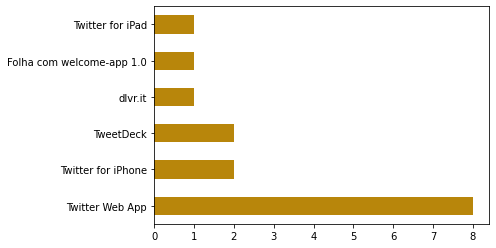

In [20]:
sources_sorted = sourceDF.sort_values('source', ascending=False)
ax = sources_sorted.source.plot(kind='barh', color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#### Análise de polaridade

In [21]:
from textblob import TextBlob as tb

In [22]:
analysis = None
polarities = []

#### Calcula polaridade(sentiment.polarity)

In [23]:
for tweet in tweets_df['Tweets']:
    analysis = tb(tweet)
    
    if analysis.detect_language() != 'en':
        traducao = tb(str(analysis.translate(to='en')))
        print('Texto traduzido %s: ' % traducao)
        polarity = traducao.sentiment.polarity
    else:
        polarity = analysis.sentiment.polarity
        
    polarities.append(polarity)

Texto traduzido Caixa server loses father and mother to Covid-19 after having denied home office in DF https://t.co/A3StClKNSB https://t.co/RMbKh7axXI: 
Texto traduzido More home office for well-trained people brings destruction of low-skilled jobs https://t.co/azBXYlItPb: 
Texto traduzido Caixa employee's parents died with Covid-19 after the bank denied home office, says union (via @radaronline) https://t.co/TGO5siILiy https://t.co/jzMZhATIem: 
Texto traduzido The home office took away something terrible that was also good for us: the traffic back home. It's great not to have it, obviously. But it is necessary to find a substitute for the role he played: that of post-work decompression, the act of disconnecting, listening to music, thinking about other things.: 
Texto traduzido For the normalization of that look in the home office! 😂 @zecapagodinho # ÉDeCasa https://t.co/kPeHL1TpQp: 
Texto traduzido Research DataFolha points out that household chores make home office difficult for 64.

In [24]:
print('Vetor de polaridade:', polarities)

Vetor de polaridade: [-0.3, 0.5, 0.0, 0.05357142857142857, 0.0, -0.31333333333333335, 0.0, -0.37777777777777777, -0.5, 0.2333333333333333, 0.2625, -0.04791666666666667, 0.012121212121212116, 0.06, 0.0]


In [25]:
print('Média de Sentimento: ', str(np.mean(polarities)))

Média de Sentimento:  -0.02783345358345359


#### Análise de Sentimentos

In [26]:
print('Para a(s) palavra(s): "%s"' % keyword)
print('A média de sentimento é: ' + str(np.mean(polarities)))

Para a(s) palavra(s): ""home office" OR "trabalho remoto" OR #homeoffice OR #trabalhoremoto"
A média de sentimento é: -0.02783345358345359


In [27]:
positive = 0
negative = 0
neutral = 0

for p in polarities:
    if p > 0:
        positive = positive + 1
    elif p < 0:
        negative = negative + 1
    else:
        neutral = neutral + 1
        
# Calcula o percentual
pos_pct = positive * 100 / len(polarities)
neg_pct = negative * 100 / len(polarities)
neu_pct = neutral * 100 / len(polarities)

In [28]:
sentiments = ['Positivos', 'Negativos', 'Neutros']
percents = [pos_pct, neg_pct, neu_pct]
percents

[40.0, 33.333333333333336, 26.666666666666668]

In [29]:
pie_chart = pd.Series(percents, index=sentiments, name='')
pie_chart

Positivos    40.000000
Negativos    33.333333
Neutros      26.666667
Name: , dtype: float64

<AxesSubplot:title={'center':'Análise de Sentimentos Tweets sobre Home Office'}>

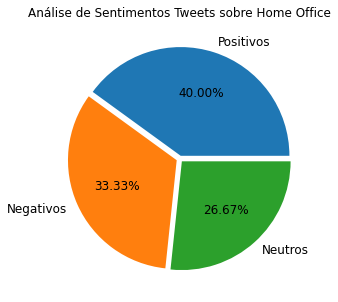

In [30]:
pie_chart.plot.pie(fontsize=12, autopct='%.2f%%', figsize=(5,5),
                  labels=pie_chart.index, explode=(0.03,0.03,0.03),
                  title='Análise de Sentimentos Tweets sobre Home Office')

#### Mapa de calor dos tweets

In [31]:
from geopy.geocoders import Nominatim
from folium import plugins
import folium

In [32]:
locator = Nominatim(user_agent='TweeterSentiments')
exemplo = locator.geocode("Uberlândia")

In [33]:
exemplo

Location(Uberlândia, Microrregião Uberlândia, Mesorregião Triângulo Mineiro/Alto Paranaiba, Minas Gerais, Região Sudeste, Brasil, (-18.9188041, -48.2767837, 0.0))

In [34]:
exemplo.latitude

-18.9188041

In [35]:
exemplo.longitude

-48.2767837

In [36]:
geolocator = Nominatim(user_agent='TweeterSentiments')

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [37]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('Mapa_Calor_Home_Office.html')
mapa

#### Nuvem de palavras

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
# Para textos em português
stopwords = set(STOPWORDS)

In [40]:
# Para textos em inglês
words = ' '.join(tweets_df['Tweets'])

words_clean = ' '.join([word for word in words.split()
                                           if 'https' not in word
                                                and not word.startswith('@')
                                                and not word.startswith('#')
                                                and word != 'RT'
                       ])

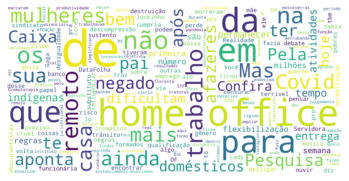

In [41]:
import warnings
warnings.simplefilter('ignore')

wc = WordCloud(
    min_font_size=10,
    max_font_size=300,
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000,
    normalize_plurals=True).generate(words_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('home_office.png', dp=300)
plt.show()